In [7]:
from Source.implisitt import viewImplisitt
file= '../hdr-bilder/Adjuster/Adjuster_00008.png'

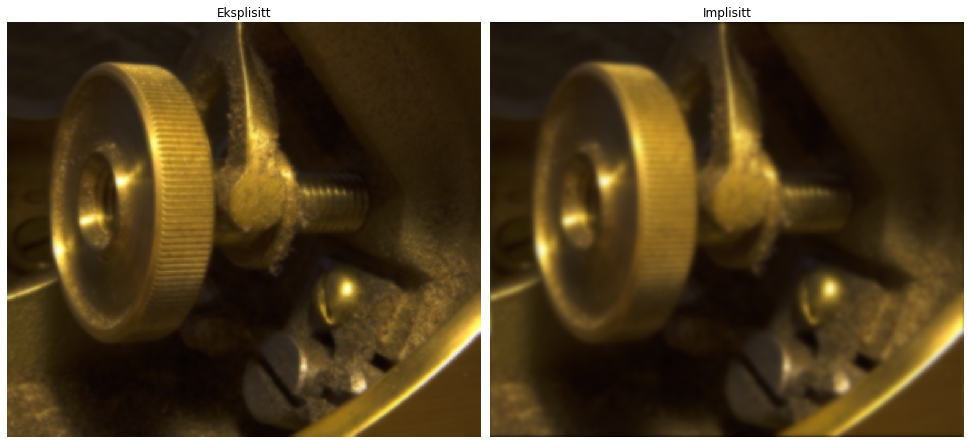

Wall time: 1min 58s


In [8]:
%%time 
viewImplisitt(file)